In [1]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

C:\Users\swaro\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the pre-trained model for neural style transfer
hub_module = "https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2"
style_transfer_model = hub.load(hub_module)

In [3]:
# Load and preprocess the images
def load_and_process_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (256, 256))
    return image[tf.newaxis, :]  

In [4]:
content_image_path = r"C:\Users\swaro\30 day challenge\Day19\test1.jpg"
style_image_path = r"C:\Users\swaro\30 day challenge\Day19\test2.jpg"

In [5]:
content_image = load_and_process_image(content_image_path)
style_image = load_and_process_image(style_image_path)


In [6]:
# Perform style transfer
stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]

In [7]:
# Display the images
plt.figure(figsize=(15, 15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

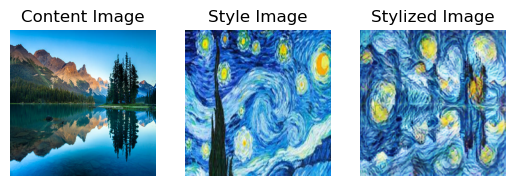

In [11]:
# Display content image
plt.subplot(1, 3, 1)
plt.imshow(content_image[0])
plt.title("Content Image")
plt.axis('off')

# Display style image
plt.subplot(1, 3, 2)
plt.imshow(style_image[0])
plt.title("Style Image")
plt.axis('off')

# Display stylized image
plt.subplot(1, 3, 3)
plt.imshow(stylized_image[0])
plt.title("Stylized Image")
plt.axis('off')

plt.show()